# SPRINT 10 - Projeto

### Etapa 1 - Baixando e preparando os dados

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
data_0 = pd.read_csv('datasets/geo_data_0.csv')
data_1 = pd.read_csv('datasets/geo_data_1.csv')
data_2 = pd.read_csv('datasets/geo_data_2.csv')

In [36]:
data_0.info()
data_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [37]:
data_1.info()
data_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [38]:
data_2.info()
data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Carreguei os dados e conferi cada DataFrame para verificar se haviam problemas, mas está tudo em ordem.

In [39]:
def plot_histograms(data, region_name):
    features = ['f0', 'f1', 'f2', 'product']
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, bins=30, ax=axes[i], color='blue')
        axes[i].set_title(f'Histograma de {feature} - {region_name}')
    
    plt.tight_layout()
    plt.show()

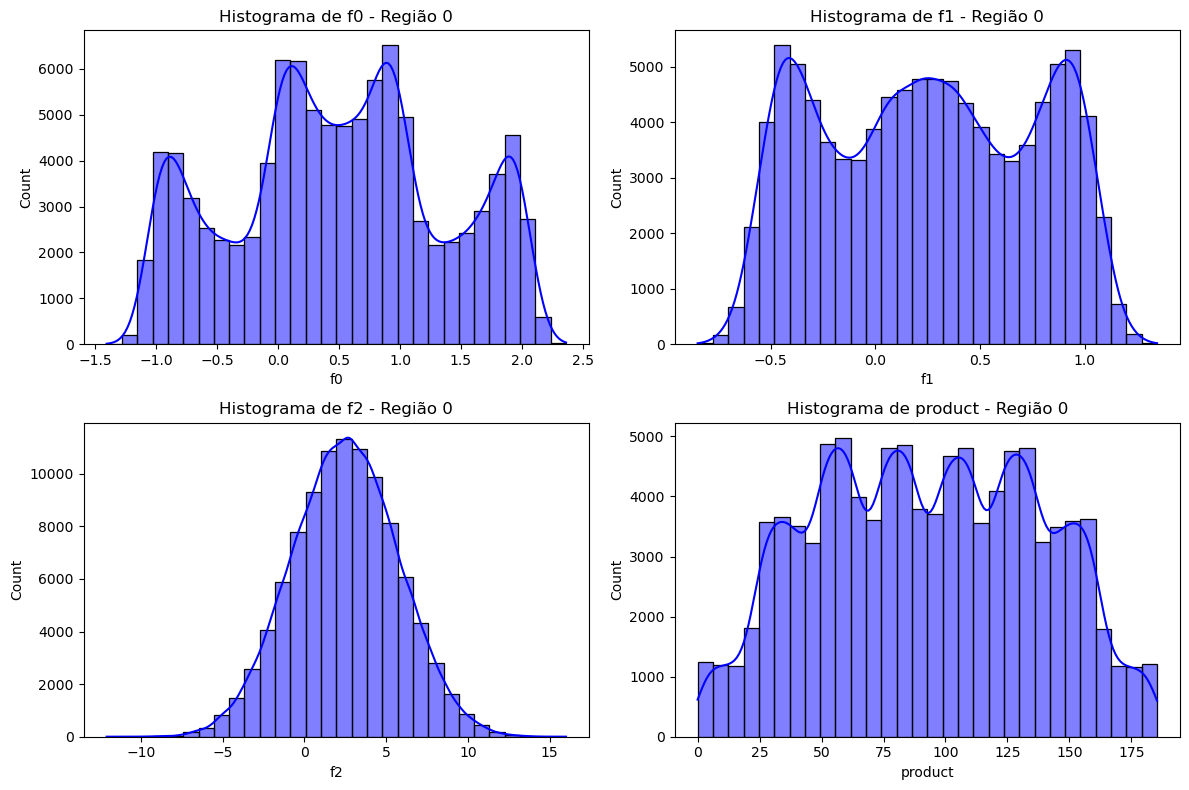

In [40]:
plot_histograms(data_0, "Região 0")

##### Região 0

- `f0 e f1` → distribuições multimodais (vários picos). Isso indica que os dados dessas features não seguem uma normal simples, mas sim têm diferentes concentrações de valores em faixas específicas.

- `f2` → segue uma distribuição aproximadamente normal, centrada perto de 3–4.

- `product` → também multimodal, com vários picos. Isso sugere que o volume de reservas previstas pode variar bastante, dependendo do subconjunto da região.

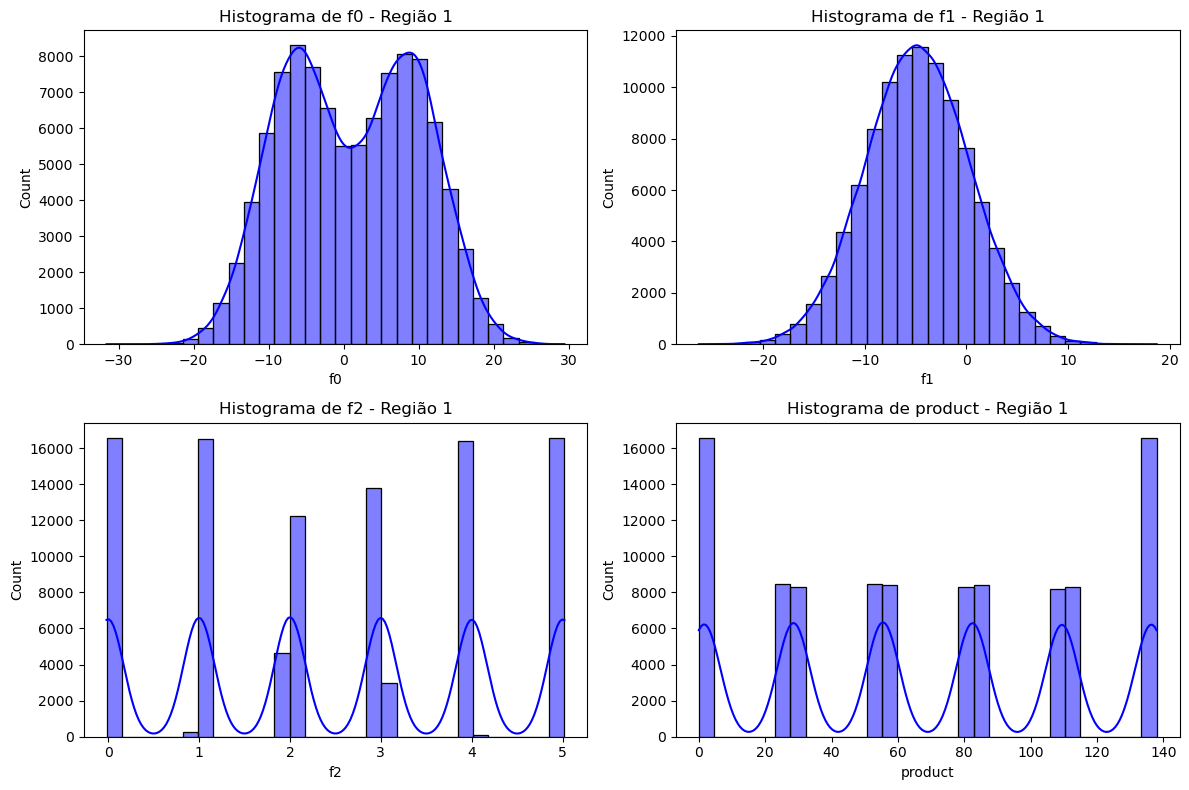

In [41]:
plot_histograms(data_1, "Região 1")

##### Região 1

- `f0` → bimodal (dois picos bem marcados).

- `f1` → aproximadamente normal, centrado próximo de -5.

- `f2` → distribuição discreta, com valores em faixas fixas (degraus), sem ser contínua.

- `product` → comportamento semelhante ao de f2, também em degraus.

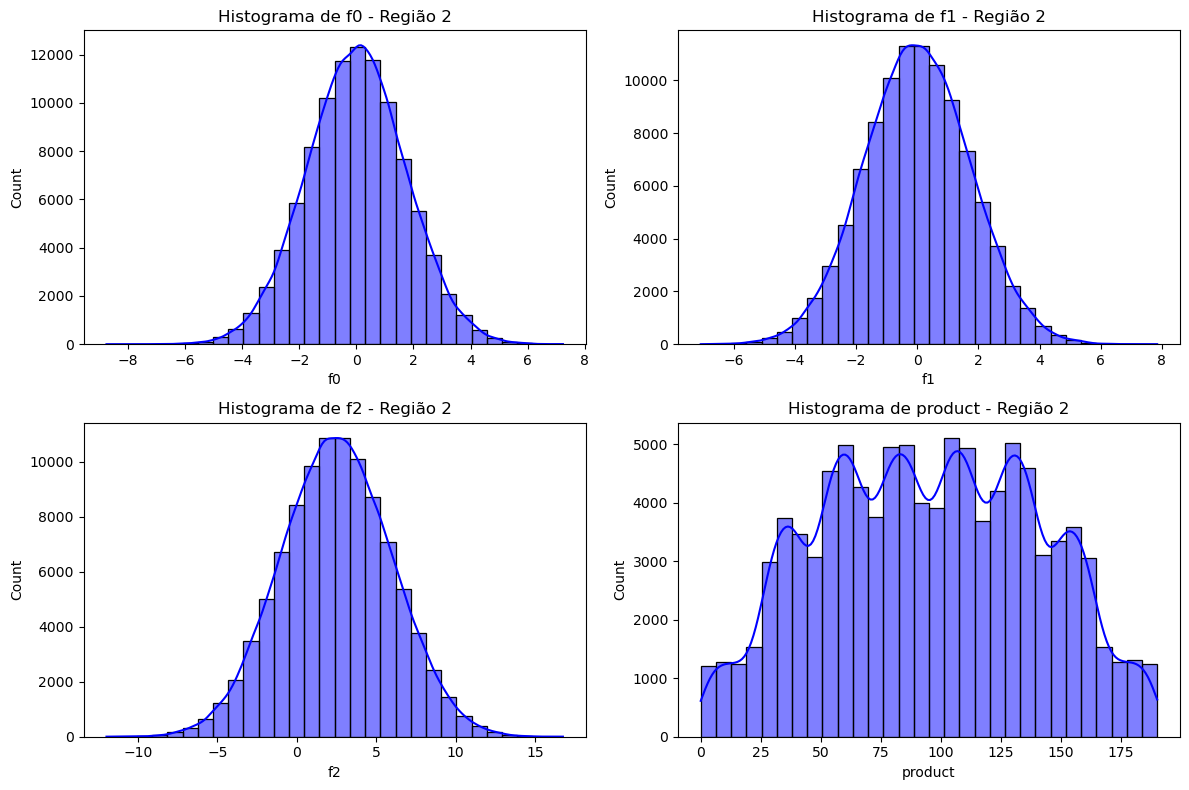

In [42]:
plot_histograms(data_2, "Região 2")

##### Região 2

- `f0, f1 e f2` → distribuições aproximadamente normais, centradas perto de 0.

- `product` → multimodal, mas mais equilibrado que o da região 0.

### Etapa 2 - Treinando o modelo

#### 2.1 - Função

In [43]:
def train_and_evaluate(data):
    
    # 1. Definir features e target
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    # 2. Dividir em treino e validação
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=22
    )
    
    # 3. Escalonar dados
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_valid_scaled = scaler.transform(features_valid)
    
    # 4. Treinar modelo
    model = LinearRegression()
    model.fit(features_train_scaled, target_train)
    
    # 5. Fazer previsões
    predictions = model.predict(features_valid_scaled)
    
    # 6. Calcular métricas
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    mean_predicted = predictions.mean()
    
    return mean_predicted, rmse, predictions, target_valid, model, scaler

#### 2.2 - Análise de resultados

##### 2.2.1 - Região 0

In [44]:
mean_pred_0, rmse_0, preds_0, target_valid_0, model_0, scaler_0 = train_and_evaluate(data_0)
print("Região 0")
print("Volume médio previsto:", mean_pred_0)
print("RMSE:", rmse_0)
print()

Região 0
Volume médio previsto: 92.53987606504546
RMSE: 37.411414310487665



Na região 0 o erro é alto, quase 40% da previsão média.
O modelo não é muito confiável para prever cada poço individualmente, mas ainda pode servir para identificar tendências gerais.

##### 2.2.2 - Região 1

In [45]:
mean_pred_1, rmse_1, preds_1, target_valid_1, model_1, scaler_1 = train_and_evaluate(data_1)
print("Região 1")
print("Volume médio previsto:", mean_pred_1)
print("RMSE:", rmse_1)
print()

Região 1
Volume médio previsto: 68.72413030510707
RMSE: 0.8916430396076015



Aqui o modelo é muito mais preciso. O erro é menos de 1 barril por mil barris previstos.
Mesmo que o volume médio seja menor que nas outras regiões, a previsibilidade pode compensar.

##### 2.2.3 - Região 2

In [46]:
mean_pred_2, rmse_2, preds_2, target_valid_2, model_2, scaler_2 = train_and_evaluate(data_2)
print("Região 2")
print("Volume médio previsto:", mean_pred_2)
print("RMSE:", rmse_2)

Região 2
Volume médio previsto: 94.87523935481292
RMSE: 40.161072438148516


Essa região tem a maior média prevista de reservas, mas o erro é o maior de todos.

### Etapa 3 - Preparação para o cálculo de lucro

#### 3.1 - Declarando variáveis

In [47]:
BUDGET = 10**8  # 100 milhões
SELECTED_WELLS = 200
REVENUE_PER_UNIT = 4500  # $ por mil barris

In [48]:
min_units_per_well = BUDGET / (SELECTED_WELLS * REVENUE_PER_UNIT)
print("Produção mínima necessária por poço (mil barris):", min_units_per_well)

Produção mínima necessária por poço (mil barris): 111.11111111111111


#### 3.2 - Comparando com as regiões

In [49]:
print("Comparação com as regiões:")
print("Região 0 - média prevista:", mean_pred_0)
print("Região 1 - média prevista:", mean_pred_1)
print("Região 2 - média prevista:", mean_pred_2)

Comparação com as regiões:
Região 0 - média prevista: 92.53987606504546
Região 1 - média prevista: 68.72413030510707
Região 2 - média prevista: 94.87523935481292


#### 3.3 - Conclusão

Se o volume médio previsto de uma região for maior que 111.1, ela pode dar lucro.

Se for menor, mesmo escolhendo 200 poços, a região não cobre os custos.

### Etapa 4 - Cálculo de lucro

#### 4.1 - Função

In [50]:
def compute_top200_profit(df, model, scaler, n=200):
    X = df[['f0','f1','f2']].values
    preds = model.predict(scaler.transform(X))
    df2 = df.copy()
    df2['predicted'] = preds
    top200 = df2.sort_values('predicted', ascending=False).head(n)
    mean_top = top200['predicted'].mean()
    total_units = mean_top * n
    revenue = total_units * 4500
    profit = revenue - 100_000_000
    return {'top200_df': top200, 'mean_top': mean_top, 'profit_point': profit}

#### 4.2 - Calculando o lucro

In [51]:
profits = {}

In [52]:
profit_info_0 = compute_top200_profit(data_0, model_0, scaler_0, n=200)
profits["regiao_0"] = profit_info_0
print("Região 0")
print(f"Volume médio previsto (200 melhores): {profit_info_0['mean_top']:.2f}")
print(f"Lucro potencial: {profit_info_0['profit_point'] / 1e6:.2f} milhões de dólares")

Região 0
Volume médio previsto (200 melhores): 162.83
Lucro potencial: 46.55 milhões de dólares


c:\Users\joaod\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
profit_info_1 = compute_top200_profit(data_1, model_1, scaler_1, n=200)
profits["regiao_1"] = profit_info_1
print("Região 1")
print(f"Volume médio previsto (200 melhores): {profit_info_1['mean_top']:.2f}")
print(f"Lucro potencial: {profit_info_1['profit_point'] / 1e6:.2f} milhões de dólares")

Região 1
Volume médio previsto (200 melhores): 139.16
Lucro potencial: 25.24 milhões de dólares


c:\Users\joaod\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
profit_info_2 = compute_top200_profit(data_2, model_2, scaler_2, n=200)
profits["regiao_2"] = profit_info_2
print("Região 2")
print(f"Volume médio previsto (200 melhores): {profit_info_2['mean_top']:.2f}")
print(f"Lucro potencial: {profit_info_2['profit_point'] / 1e6:.2f} milhões de dólares")

Região 2
Volume médio previsto (200 melhores): 156.53
Lucro potencial: 40.88 milhões de dólares


c:\Users\joaod\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### 4.3 - Conclusão

A Região 0 apresenta o maior lucro potencial `(46.55 milhões)`, além de ter o maior volume médio previsto entre os 200 melhores poços. Por isso, deve ser selecionada para o desenvolvimento de poços de petróleo.

A Região 1 tem desempenho claramente inferior `(25.24 milhões)`, sendo a menos atrativa para investimento.

A Região 2 também é promissora `(40.88 milhões)`, mas ainda assim fica abaixo da Região 0.

### Etapa 5 - Riscos e lucros

#### 5.1 - Função

In [55]:
def bootstrap_profit(data, model, scaler, n_bootstrap=1000, sample_size=500,
                     top_wells=200, budget=10e9, price_per_unit=450000, seed=22):
    profits = []
    
    # Definir gerador aleatório com semente fixa
    rng = np.random.RandomState(seed)
    
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    # Previsões do modelo
    predictions = model.predict(scaler.transform(features))
    
    for _ in range(n_bootstrap):
        # Usar rng.choice em vez de np.random.choice
        indices = rng.choice(len(data), size=sample_size, replace=True)
        
        sample_predictions = predictions[indices]
        sample_target = target.iloc[indices].values
        
        # Selecionar top 200 pelas previsões
        top_indices = sample_predictions.argsort()[-top_wells:]
        selected_true = sample_target[top_indices]
        
        # Calcular lucro
        revenue = selected_true.sum() * price_per_unit
        profit = revenue - budget
        profits.append(profit)
    
    profits = np.array(profits)
    mean_profit = profits.mean()
    conf_interval = np.percentile(profits, [2.5, 97.5])
    risk = (profits < 0).mean()
    
    return mean_profit, conf_interval, risk

#### 5.2 - Riscos e lucros para cada região

In [56]:
for i, (data, model, scaler) in enumerate([
    (data_0, model_0, scaler_0),
    (data_1, model_1, scaler_1),
    (data_2, model_2, scaler_2)
]):
    mean_profit, conf_int, risk = bootstrap_profit(data, model, scaler)
    
    print(f"\nRegião {i}")
    print(f"Lucro médio: {mean_profit / 1e6:.2f} milhões de dólares")
    print(f"IC 95%: ({conf_int[0] / 1e6:.2f}, {conf_int[1] / 1e6:.2f}) milhões de dólares")
    print(f"Risco de prejuízo: {risk*100:.2f}%")


Região 0
Lucro médio: 409.72 milhões de dólares
IC 95%: (-81.04, 892.54) milhões de dólares
Risco de prejuízo: 5.80%

Região 1
Lucro médio: 456.06 milhões de dólares
IC 95%: (63.19, 863.89) milhões de dólares
Risco de prejuízo: 1.20%

Região 2
Lucro médio: 372.23 milhões de dólares
IC 95%: (-200.46, 900.94) milhões de dólares
Risco de prejuízo: 9.00%


#### 5.3 - Conclusão

Apesar de a região 0 parecer mais promissora inicialmente (passo 4), a análise de riscos com bootstrapping mostra que a região 1 é a melhor escolha, pois:

- Apresenta o maior lucro médio esperado (456 milhões de dólares).

- Tem um intervalo de confiança estável e todo positivo.

- O risco de prejuízo (1.2%) está abaixo do limite de 2.5% definido.

Portanto, a recomendação final é investir na região 1.